<a href="https://colab.research.google.com/github/Armeldjogo/NLP/blob/main/Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Armel Nsiangani

Student ID#: 001-99-1988


NLP - Exam 2

In [1]:
# Downloading packages
%matplotlib inline
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
import tensorflow_hub as hub
import zipfile
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.feature_extraction.text import CountVectorizer # Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.naive_bayes import MultinomialNB # Bayes
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.svm import SVC # SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import sklearn.metrics 
from sklearn.metrics import confusion_matrix
import sklearn.metrics 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')
# Random seed
from numpy.random import seed
seed(12345)

import spacy.cli
import en_core_web_sm
spacy.cli.download('en_core_web_lg')
spacy.cli.download('en')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


Question 1: 

Write a function that takes a List of five words: [‘apple’, ‘house’, ‘pear’,
‘dog’, ‘doctor’] and returns a list of lists with each element being a word and a list of the top five
most similar words.

In [ ]:
# Question 1

 nlp = spacy.load('en_core_web_lg')

def returnSimByN(word,n):
  w = nlp.vocab[str(word)]
  q = [ x for x in w.vocab 
        if x.is_lower == w.is_lower and x.prob >= -15 and np.count_nonzero(x.vector)]
  by_sim = sorted(q, key=lambda wr: w.similarity(wr), reverse=True)
  final_set = []
  for wrd in by_sim[:n+2]:
    if wrd.lower_ != word and wrd.lower_ != word+'s':
      final_set.append(wrd.lower_)
  return final_set

def retunSimMultiple(arrayWords):
  # Takes list of five words
  nlp = spacy.load('en_core_web_lg')
  sim = []
  for k in arrayWords:
    foundSim = returnSimByN(k,5)
    sim.append(foundSim)

  simMultiple = [arrayWords[0],sim[0],
                 arrayWords[1],sim[1],
                 arrayWords[2],sim[2],
                 arrayWords[3],sim[3],
                 arrayWords[4],sim[4]]

  return simMultiple
    
list_original = ['apple', 'house', 'pear','dog', 'doctor']
list_with_sim = retunSimMultiple(list_original)

print(list_with_sim[:2])
print(list_with_sim[2:4])
print(list_with_sim[4:6])
print(list_with_sim[6:8])
print(list_with_sim[8:10])

['apple', ['blackberry', 'iphone', 'fruit', 'blueberry', 'strawberry']]
['house', ['home', 'apartment', 'bedroom', 'residence', 'homes']]
['pear', ['peach', 'raspberry', 'pineapple', 'plum', 'mango']]
['dog', ['puppy', 'pet', 'cat', 'puppies', 'canine']]
['doctor', ['physician', 'pharmacist', 'surgeon', 'medical', 'nurse']]


Question: Are these similar words actually similar?

Yes, the words are really similar. Although, it also the fruit "apple" to the tech company "apple".

Question 2:

Using the Homework 2 dataset, also attached in the Exam 2 files,
shakespeares-works_TXT_FolgerShakespeare.zip. Find the document to document similarity
using:

In [2]:
# Question 2

# Unzip files uploaded
import zipfile
import glob, os

path_to_zip_file = "/content/shakespeares-works_TXT_FolgerShakespeare.zip"
directory_to_extract_to = "/content/"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# Saving the data
os.chdir("/content/")
filesName = []
for namefile in glob.glob("*.txt"):
    filesName.append(namefile)


allDocuments = []
for i in range(0,len(filesName)):
  with open("/content/" + filesName[i]) as openfile:
    data = openfile.read()
    allDocuments.append(data)


In [3]:
# Computing cosine similarities + display heatMap
stopWords = stopwords.words('english')
vect = TfidfVectorizer(min_df=1, stop_words = stopWords)                                                                                                                                                                                                   
tfidf = vect.fit_transform(allDocuments)                                                                                                                                                                                                                       
pair_similarity = sklearn.metrics.pairwise.cosine_similarity(tfidf)

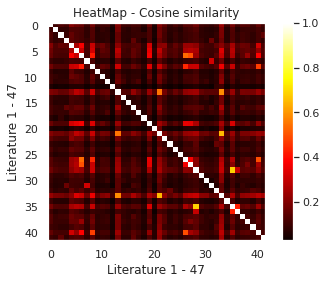

In [11]:
plt.imshow(pair_similarity)
plt.grid(False)
plt.set_cmap('hot')
plt.colorbar(orientation='vertical')
plt.title('HeatMap - Cosine similarity')
plt.xlabel('Literature 1 - 47')
plt.ylabel('Literature 1 - 47')
plt.show()

In [8]:
# heat map with Doc2Vec
from nltk.stem import SnowballStemmer
import re
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from scipy import spatial 

# Train a model
dmts = [TaggedDocument(doc, [k]) for k, doc in enumerate(common_texts)]
model = Doc2Vec(dmts, vector_size=5, window=2, min_count=1, workers=4)

def cosDistanceDoc2Vec(sent_1, sent_2,model):
  v_1 = model.infer_vector(sent_1.split())
  v_2 = model.infer_vector(sent_2.split())
  cos_distance = spatial.distance.cosine(v_1, v_2)
  return cos_distance

# Create Matrix
sim_matrix = np.ones(shape=(len(allDocuments),len(allDocuments))) 

for i in range(0,len(allDocuments)):
  for k in range(0,len(allDocuments)):
    sim_matrix[k,i] = cosDistanceDoc2Vec(allDocuments[i],allDocuments[k],model)
print(sim_matrix)

[[1.07288361e-06 1.43945524e+00 3.27416122e-01 ... 4.83564913e-01
  7.24068671e-01 1.56241107e+00]
 [1.43927050e+00 1.25169754e-06 1.48107085e+00 ... 8.28926370e-01
  9.64353602e-01 1.00464658e+00]
 [3.28028321e-01 1.48192838e+00 1.07288361e-06 ... 4.55707729e-01
  8.04922685e-01 1.27939457e+00]
 ...
 [4.82137263e-01 8.28985095e-01 4.56567407e-01 ... 7.74860382e-07
  2.34854996e-01 9.24862258e-01]
 [7.22783118e-01 9.63229079e-01 8.04755449e-01 ... 2.35585690e-01
  1.37090683e-06 4.98070359e-01]
 [1.56282663e+00 1.00573711e+00 1.28001842e+00 ... 9.27780926e-01
  4.99973297e-01 5.90085983e-06]]


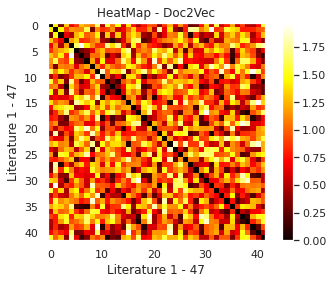

In [10]:
plt.imshow(sim_matrix)
plt.grid(False)
plt.set_cmap('hot')
plt.colorbar(orientation='vertical')
plt.title('HeatMap - Doc2Vec')
plt.xlabel('Literature 1 - 47')
plt.ylabel('Literature 1 - 47')
plt.show()

Question: What are the differences between the methods?

I found the Cosine approach to be less noiser. As shown on the cosine similarity heatmap, it is easier to distinguish the outstanding (e.g. common) works than in the Doc2Vec heatmap. In the latter, it seems to be noiser. However, I believe they are relating the same outcome. In the cosine similarity, the higher the value (>0) the more similar are the works. In the Doc2Vec, the close to zero (distance between works) their comparing values are, the more similar they are. In the example above, the light areas of the cosine similarity matrix coincides to the dark areas of the Doc2Vec areas. Therefore, they are really similar.

Question 3: 


 Using the Homework 2 dataset. Use SpaCy to extract the following

In [ ]:
# Question 3

# a) create function for input: concatenated data
merged_files = ''
for i in allDocuments:
  merged_files = merged_files + i


In [ ]:
nlp = spacy.load('en')
documents = nlp(merged_files)

for noun in list(documents.noun_chunks):
  noun.merge(noun.root.tag_, noun.root.lemma_, noun.root.ent_type_)
 
# [(token.text,token.pos_) for token in doc]

In [ ]:
nlp = spacy.load('en')
nlp.max_length = 6000000

In [ ]:
documents = nlp(merged_files)

Problem: I could not run this section due to memory issue in colab.

Question 4:

Using the dataset: Ask0729, found in Exam files, write two functions to
extract all dates found in this dataset. The input of these functions should take the dataset as
input, and output a list of dates. You should use two different methods, one per function.


In [12]:
# Question 4
# extracting data
import glob, os 
path_to_zip_file = "/content/Ask0729.zip"
directory_to_extract_to = "/content/ask_extracted"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# Saving the data
os.chdir("/content/ask_extracted/")
filesName = []
for namefile in glob.glob("*.txt"):
    filesName.append(namefile)


with open("/content/ask_extracted/" + filesName[0]) as openfile:
  data_Q4 = openfile.read()

with open("/content/ask_extracted/" + filesName[0]) as openfile:
  data_Q4_2 = openfile.readlines()


a) Using SpaCy & Print

In [13]:
# Load folder/Package
from spacy.matcher import Matcher
nlp = spacy.load('en')


In [15]:
# Using patterns
def spacyExctractDates(d):
  documents = nlp(d)
  matcher = Matcher(nlp.vocab)
  matcher = Matcher(nlp.vocab)
  patterns =  [[{"LOWER": "monday"},{"IS_PUNCT": True}, {"IS_STOP": False}], 
             [{"LOWER": "tuesday"},{"IS_PUNCT": True}, {"IS_STOP": False}],
             [{"LOWER": "wednesday"},{"IS_PUNCT": True}, {"IS_STOP": False}],
             [{"LOWER": "thursday"},{"IS_PUNCT": True}, {"IS_STOP": False}],
             [{"LOWER": "friday"},{"IS_PUNCT": True}, {"IS_STOP": False}],
             [{"LOWER": "saturday"},{"IS_PUNCT": True}, {"IS_STOP": False}],
             [{"LOWER": "sunday"},{"IS_PUNCT": True}, {"IS_STOP": False}]
             ]
            
  matcher.add("dateSpacy", patterns)
  matches = matcher(documents)
  return matches,documents

m,docmts =  spacyExctractDates(data_Q4)

print('Results using SpaCy')
print('----------------------------------------')
for match_id, start, end in m: 
    span = docmts[start:end+1]
    print(span.text)

Results using SpaCy
----------------------------------------
Monday.
No
Tuesday, March 20
Wednesday .
No
Thursday.
No
Wednesday, June 27
Thursday.
No
Monday, September 2nd
Thursday.
No
Tuesday, October 24
Wednesday, July 31
Monday, January 14
Monday, April 23rd
Monday, January 29
Thursday, June 14
Monday.
No
Thursday.
No
Wednesday, October 25
Wednesday)?

Wednesday.
No
Saturday.
No
Wednesday, December 31st
Friday:
No
Monday, April 16th
Monday, August 6th
Monday, June 4th
Tuesday.
No
Friday, October 26
Saturday (10th)
Monday.
No
Tuesday, October 2
Friday.
No
Tuesday, June 12
Thursday - Tex Mex
Monday.
No
Friday.
No
Monday!
No
Sunday.
No
Friday, April the
Monday.
No
Thursday.
No
Monday, December 16th
Wednesday.
No
Wednesday.
No
Wednesday, August 28th
Sunday, July 14th
Friday, June1st regarding
Thursday & Friday.
Friday.
No
Thursday, January 25
Thursday, September 19th
Wednesday.
No
Thursday.
No
Monday.
No
Wednesday, August 2nd
Thursday, 31st January
Sunday), I
Monday, October 8
Friday.
Y

b) Using RegEx & Print

In [16]:
# Using regex 
import re

def findDatesRegex(d):
  pattern = re.compile("(Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday ?)+,\s") 
  dates = []
  for k in data_Q4_2:
    if pattern.search(k) != None:
      p = pattern.search(str(k))
      word = str(k)[p.start() : p.start()+ 18]
      dates.append(word)
  return dates

rstl = findDatesRegex(data_Q4_2)
print('Results using RegEx')
print('----------------------------------------')
for w in rstl: 
    print(w)

Results using RegEx
----------------------------------------
Saturday, but I do
Tuesday, March 20,
Friday, most of my
Monday, my office.
Wednesday, June 27
Monday, September 
Tuesday, I wanted 
Tuesday, October 2
Wednesday, July 31
Monday, January 14
Monday, April 23rd
Monday, January 29
Thursday, June 14,
Friday, they were 
Monday, or that th
Wednesday, October
Wednesday, Decembe
Monday, April 16th
Monday, August 6th
Monday, June 4th ည
Monday, May 14th

Friday, October 26
Friday, May 25.

Tuesday, October 2
Tuesday, June 12, 
Friday, April the 
Monday, December 1
Wednesday, August 
Sunday, July 14th 
Sunday, I did some
Friday, June1st re
Thursday, January 
Thursday, Septembe
Wednesday, August 
Tuesday, though I 
Monday, don't hesi
Thursday, 31st Jan
Tuesday, you may w
Monday, October 8,
Sunday, December 8
Monday, November 1
Wednesday, Septemb
Thursday, usual ti
Tuesday, and in th
Saturday, March 25
Monday, per our co
Tuesday, January 8
Thursday, March 22
Tuesday, February 
Monday, Jun

Question: 

a) Which approach is better? The Regex Approach seems to be more elegant and better in its results. Spacy can be fine-tuned to produce similar results, but it would require more patterns.

Personally, I would either use the RegEx method to achieve such result. It is faster and better in my opinion. 

Question 5:

Train an LSTM model to classify the Cornell Movie Review data
using the polarity_dataset V2.0


In [2]:
# Question 5
# Unzip tar files 
import tarfile
path_to_file = "/content/question_5/review_polarity.tar.gz"
directory_to_extract_to = "/content/question_5/"
tar_file = tarfile.open(path_to_file)
tar_file.extractall(directory_to_extract_to) 
tar_file.close()


In [5]:
# Create Training data - negative dataSet
import glob, os
dirName_1 = "/content/question_5/txt_sentoken/neg/"
dirName_2 = "/content/question_5/txt_sentoken/pos/"

def returnDataInArray(dirName):
  os.chdir(dirName)
  filesName = []
  for namefile in glob.glob("*.txt"):
    filesName.append(namefile)

  reviews = []
  for i in range(0,len(filesName)):
    with open(dirName + filesName[i]) as openfile:
      data = openfile.read()
      reviews.append(data) 
  return reviews,filesName

negReviews,neg_fileName = returnDataInArray(dirName_1)
posReviews,pos_fileName = returnDataInArray(dirName_2)

# Lets merge neg & pos reviews by altenating b/w the sets 
mergedReviews = []
targetReviews = []
for i in range(0,len(negReviews)):
    mergedReviews.append(negReviews[i])
    mergedReviews.append(posReviews[i])
    targetReviews.append(0)
    targetReviews.append(1)
# DataFrame with merged data
df_all = pd.DataFrame({"polarity": targetReviews,"text": mergedReviews}) # Merged reviews
df_neg = pd.DataFrame({"polarity": np.zeros(len(negReviews)),"text": negReviews}) # Negative reviews
df_pos = pd.DataFrame({"polarity": np.ones(len(posReviews)),"text": posReviews}) # Positive reviews

In [6]:
# Download packages
!pip install numpy==1.16.2
# All the imports!
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
from sklearn.metrics import classification_report
# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True


     |████████████████████████████████| 17.3MB 202kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.16.2 which is incompatible.
ERROR: pyarrow 3.0.0 has requirement numpy>=1.16.6, but you'll have numpy 1.16.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.2 has requirement numpy>=1.17, but you'll have numpy 1.16.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [7]:
# Split the data
train, test = train_test_split(df_all, train_size= 0.85, test_size = 0.15)

In [10]:
# The length of reviews
length = 450
# Padding the training data
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['text'].values)
word_index = tokenizer.word_index
x_train = tokenizer.texts_to_sequences(train['text'].values)
x_train = sequence.pad_sequences(x_train, maxlen= length)

In [11]:
# Building the model
vocab_size = len(word_index) + 1
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = length # Length of input sequences
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 450, 32)           1438048   
_________________________________________________________________
dropout (Dropout)            (None, 450, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,446,401
Trainable params: 1,446,401
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Create the model
y_train = np.array(train[['polarity']].values)

model.fit(x_train,y_train,batch_size=1024,epochs=5, validation_split=0.2,verbose=1) 

Epoch 1/5
2/2 [==============================] - 34s 693ms/step - loss: 0.6932 - accuracy: 0.5150 - val_loss: 0.6931 - val_accuracy: 0.4824
Epoch 2/5
2/2 [==============================] - 0s 123ms/step - loss: 0.6925 - accuracy: 0.5434 - val_loss: 0.6927 - val_accuracy: 0.5559
Epoch 3/5
2/2 [==============================] - 0s 120ms/step - loss: 0.6918 - accuracy: 0.5813 - val_loss: 0.6923 - val_accuracy: 0.5618
Epoch 4/5
2/2 [==============================] - 0s 115ms/step - loss: 0.6908 - accuracy: 0.6018 - val_loss: 0.6919 - val_accuracy: 0.5529
Epoch 5/5
2/2 [==============================] - 0s 117ms/step - loss: 0.6897 - accuracy: 0.5938 - val_loss: 0.6916 - val_accuracy: 0.5647


In [14]:
# Testing performance
# Padding the data
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(test['text'].values)
word_index = tokenizer.word_index
x_test = tokenizer.texts_to_sequences(test['text'].values)
x_test = sequence.pad_sequences(x_test, maxlen= length)
y_test = np.array(test[['polarity']].values)

# Labelling scores
class_names = ["Negative", "Positive"]

# Printing results
predicted_classes = model.predict_classes(x_test)
LSTM_report = classification_report(y_test, predicted_classes, target_names=class_names)
print('Performance: LSTM')
print(LSTM_report)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Performance: LSTM
              precision    recall  f1-score   support

    Negative       0.64      0.09      0.15       159
    Positive       0.48      0.94      0.63       141

    accuracy                           0.49       300
   macro avg       0.56      0.52      0.39       300
weighted avg       0.56      0.49      0.38       300



Question:

What are you noticing?

Comapred to the IMDB results, I notice that the performance that I have is not as good. This may be due to the training size of the data. I have used far less than what was used in the IMDB report. One way to improving my result & performance could have been further preprocessing steps before running both the training and testing data set.

Question 6: 

Use the train.txt file from the PubMed 20K RCT dataset fine-tune a
BERT transformer (class 9 code)


In [12]:
# Question 6
# import tensorflow as tf
# import torch
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [14]:
# import torch
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P4


In [4]:
# Loading CoLA Dataset

!pip install transformers
!pip install wget
import wget
import os

print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

# Download the file (if we haven't already)
if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(url, './cola_public_1.1.zip')
# Unzip the dataset (if we haven't already)
if not os.path.exists('./cola_public/'):
    !unzip cola_public_1.1.zip

import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

# Get the lists of sentences and their labels.
sentences = df.sentence.values
labels = df.label.values

     |████████████████████████████████| 2.2MB 5.4MB/s 
     |████████████████████████████████| 870kB 26.1MB/s 
     |████████████████████████████████| 3.3MB 34.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=31a7381eafe5b3ce7c38a795f0e2373093fb799d127a3b0ebe587f744bdc2060
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=452cf6c07c122fc44e631e8314be3e98c7cda1e214baf14449ebeb30ad364281
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Archive:  cola_public_1.1.zip
   creating: cola_public/
  inflating: cola_public/README      
   creating: cola_public/tokenized/
  inflating: cola_public/tokenized/in_domain_dev.tsv  
  inflating: cola_public/tokenized/in_domain_train.tsv  
  inflating: cola_

In [3]:
import numpy as np
# Loading train set
# Create new dataBase with paper data 

with open("/content/train.txt") as openfile:
      raw_data = openfile.readlines() 

# separate data by class: 
c1 = [] # "background"
c1_label = []
c2 = [] # "objective"
c2_label = []
c3 = [] # "methods"
c3_label = []
c4 = [] # "results"
c4_label = []
c5 = []  # "conclusions"
c5_label = []

for k in raw_data:
  if k[0] != '#':
    if k[:10] == "BACKGROUND":
      c1.append(k[10:])
      c1_label.append(0)
    if k[:9] == "OBJECTIVE":
      c2.append(k[9:])
      c2_label.append(1)
    if k[:7] == "METHODS":
      c3.append(k[7:])
      c3_label.append(2)
    if k[:7] == "RESULTS":
      c4.append(k[7:])
      c4_label.append(3)
    if k[:11] == "CONCLUSIONS":
      c5.append(k[11:])
      c5_label.append(4)

# Merging all 
sentences_new = np.array(c1 + c2 + c3 + c4 + c5)
label_new = np.array(c1_label + c2_label + c3_label + c4_label + c5_label) 

In [4]:
# Applying changes old to new
sentences = sentences_new
labels = label_new

In [ ]:
# Tokenization & Input formatting
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

In [6]:
import tensorflow as tf
import torch

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  	Emotional eating is associated with overeating and the development of obesity .

Token IDs: tensor([  101,  6832,  5983,  2003,  3378,  2007,  2058,  5243,  3436,  1998,
         1996,  2458,  1997, 24552,  1012,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [7]:
# Training & Validation split
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [8]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [9]:
# Train classification nodel
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 5, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()
 



# Optimizer
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [10]:
# Training loop
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [15]:
import random
import numpy as np

# Set the seed value all over the place to make this reproducible.
seed_val = 12345

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)                          # changed to 5 

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward` 
        # function and pass down the arguments. The `forward` function is 
        # documented here: 
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        # Get the loss and "logits" output by the model. The "logits" are the 
        # output values prior to applying an activation function like the 
        # softmax.
        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  1,908.    Elapsed: 0:00:17.
  Batch    80  of  1,908.    Elapsed: 0:00:33.
  Batch   120  of  1,908.    Elapsed: 0:00:50.
  Batch   160  of  1,908.    Elapsed: 0:01:07.
  Batch   200  of  1,908.    Elapsed: 0:01:23.
  Batch   240  of  1,908.    Elapsed: 0:01:40.
  Batch   280  of  1,908.    Elapsed: 0:01:57.
  Batch   320  of  1,908.    Elapsed: 0:02:14.
  Batch   360  of  1,908.    Elapsed: 0:02:31.
  Batch   400  of  1,908.    Elapsed: 0:02:48.
  Batch   440  of  1,908.    Elapsed: 0:03:05.
  Batch   480  of  1,908.    Elapsed: 0:03:21.
  Batch   520  of  1,908.    Elapsed: 0:03:38.
  Batch   560  of  1,908.    Elapsed: 0:03:55.
  Batch   600  of  1,908.    Elapsed: 0:04:12.
  Batch   640  of  1,908.    Elapsed: 0:04:29.
  Batch   680  of  1,908.    Elapsed: 0:04:46.
  Batch   720  of  1,908.    Elapsed: 0:05:03.
  Batch   760  of  1,908.    Elapsed: 0:05:20.
  Batch   800  of  1,908.    Elapsed: 0:05:37.
  Batch   840  of

In [17]:
# Summary of training
import pandas as pd
# Display floats with two decimal places.
pd.set_option('precision', 2)
# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)
# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.46,0.40,0.86,0:13:25,0:00:26
2,0.32,0.39,0.86,0:13:27,0:00:26
3,0.25,0.42,0.86,0:13:28,0:00:26
4,0.20,0.45,0.86,0:13:28,0:00:26


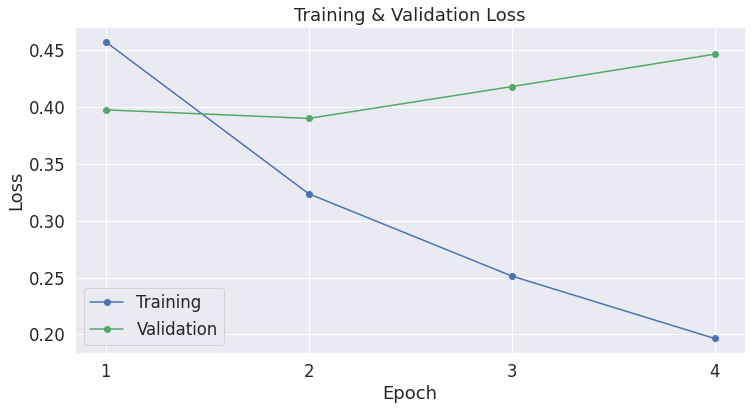

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [19]:
# Performance on test set
# Testing set
# Create new dataBase with paper data 

with open("/content/test.txt") as openfile:
      raw_data = openfile.readlines() 

# separate data by class: 
c1 = [] # "background"
c1_label = []
c2 = [] # "objective"
c2_label = []
c3 = [] # "methods"
c3_label = []
c4 = [] # "results"
c4_label = []
c5 = []  # "conclusions"
c5_label = []

for k in raw_data:
  if k[0] != '#':
    if k[:10] == "BACKGROUND":
      c1.append(k[10:])
      c1_label.append(0)
    if k[:9] == "OBJECTIVE":
      c2.append(k[9:])
      c2_label.append(1)
    if k[:7] == "METHODS":
      c3.append(k[7:])
      c3_label.append(2)
    if k[:7] == "RESULTS":
      c4.append(k[7:])
      c4_label.append(3)
    if k[:11] == "CONCLUSIONS":
      c5.append(k[11:])
      c5_label.append(4)

# Merging all 
sentences_new = np.array(c1 + c2 + c3 + c4 + c5)
label_new = np.array(c1_label + c2_label + c3_label + c4_label + c5_label) 


# Create sentence and label lists
sentences = sentences_new
labels = label_new

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [20]:
# Evaluation 
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 30,135 test sentences...
    DONE.


In [24]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


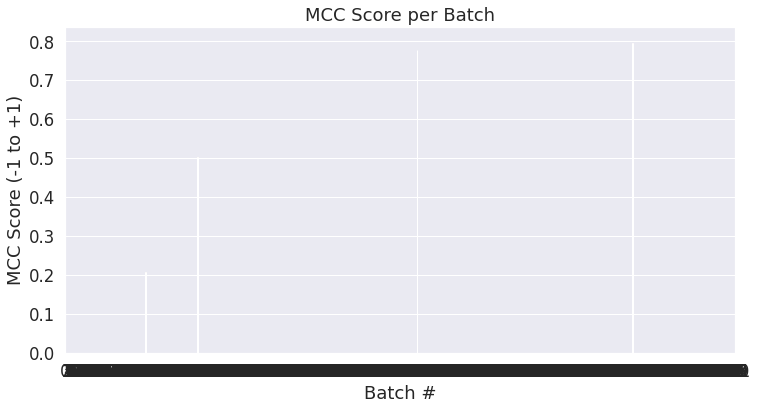

In [25]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [26]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.812


Did you model beat baseline? How to improve?

Unfortunately, I left collab running all night last night but I forgot to add the section to print the overall and per-class performance. I cannot re-run everythig since it takes a really long time to process. However, judging by the MCC score and the fact that I have no error in my code. I believe that my process was good. Looking at the final MCC score, I want to say that my model did not beat the baseline results. An efficient way to improve it could be by improving the pre-processing steps and more computing power.